## Data Structures Implementation and Analysis By Duarte Dias
In this document I am going to analise the performance of several DataStructures when presented certain types of inputs
 
### The test files
Alongside this repository there are 4 texts used as benchmark for testing and time measuring.
     
#### Text A
Description: Randomized test 
- Total words: 10000
- Unique words: 2920

#### Text B
Description: Ordered Input A -> Z
- Total words: 10000
- Unique words: 2922

#### Text C
Description: Ordered Input Z -> A
- Total words: 10038
- Unique words: 2922

#### Text D
Description: Randomized test 
- Total words: 10000
- Unique words: 84

### The Data Structures
    The goal of each Data structure is to store both the words found in the text aswell as the respective lines of each word, to store the lines a similar data structure to the original was used, therefore if a SplayTree is being used to store the words a Splay Tree is also being used to store the lines.
    The Data Structures used were the following:
- Linked List
- Binary Search Tree (as a baseline)
- AVL Tree
- RB Tree
- Splay Tree
- Treap

### The Tests
    All of the tests were run in a MacBook Pro 13" from 2017 with the following specs:
- i5-7260U
- 8 Ram
    Test Environment:
- Python 3.7.3
- StackSize of 5000
- Timer Used -> timeit
    
    All of the tests come in miliseconds


In [1]:
from matplotlib import pyplot as plt
import numpy as np

data = np.genfromtxt("Reports/raw_2.csv", delimiter=',', dtype=float)
labels =["LinkedList", "BinaryTree", "AVLTree", "RBTree", "MaxTreap", "SplayTree"]
#print(data[13,2])

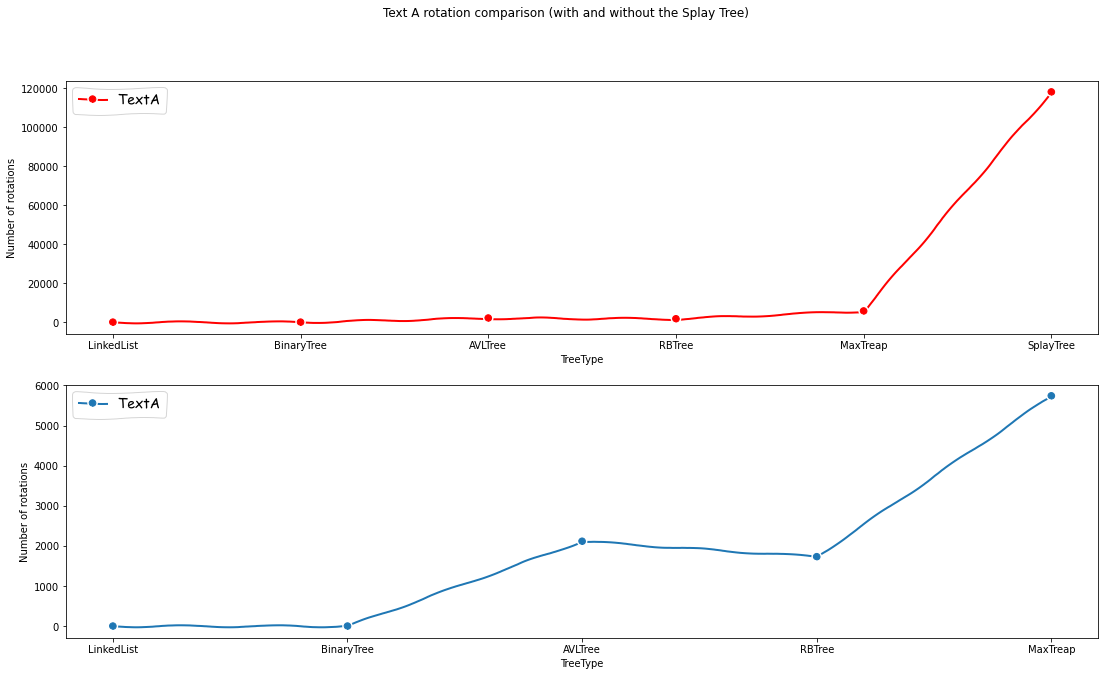

In [2]:
##Comparing rotations for text A
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Text A rotation comparison (with and without the Splay Tree)")
plt.xkcd()

axs[0].plot(labels[0:], data[1:7,4], "o-r", label="TextA")
axs[1].plot(labels[0:5], data[1:6,4], "o-", label="TextA")


for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Number of rotations")
    ax.legend()

plt.show()


#### Conclusions
Here we can see that the splay Tree as a huge amount of rotations when compared to the others, that is due to the fact that each time a node is inserted or a line is inserted in the node the whole tree rotates. On the other end

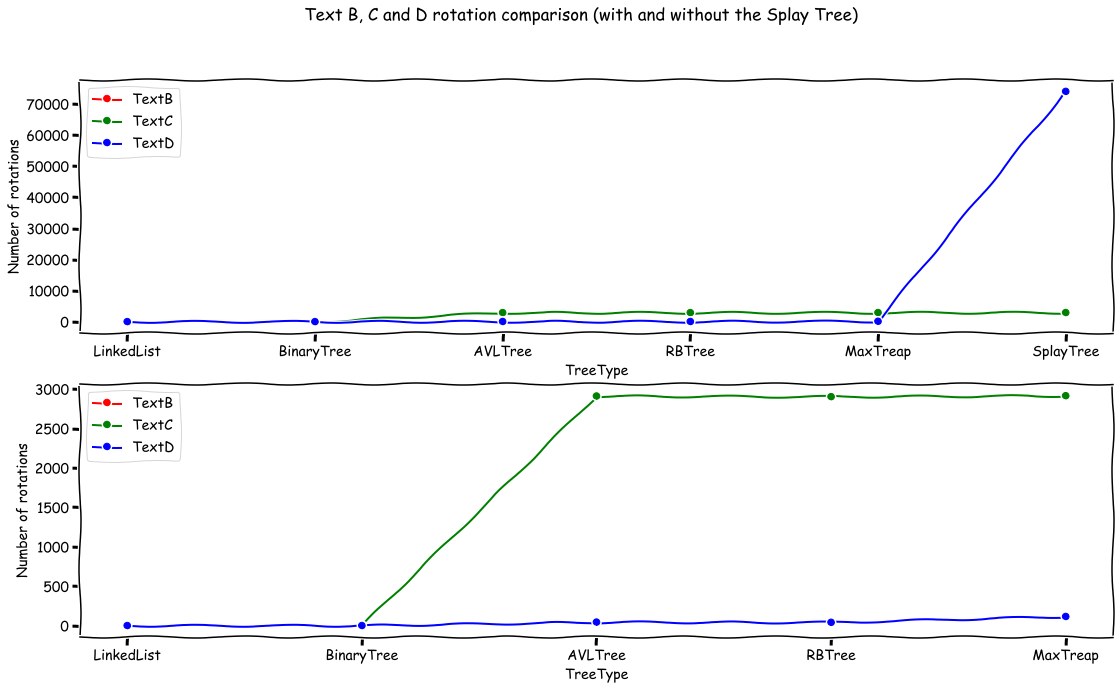

In [3]:
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Text B, C and D rotation comparison (with and without the Splay Tree)")
plt.xkcd()


axs[0].plot(labels[0:], data[7:13,4], "o-r", label="TextB")
axs[0].plot(labels[0:], data[13:19,4], "o-g", label="TextC")
axs[0].plot(labels[0:], data[19:25,4], "o-b", label="TextD")
axs[1].plot(labels[0:5], data[7:12,4], "o-r", label="TextB")
axs[1].plot(labels[0:5], data[13:18,4], "o-g", label="TextC")
axs[1].plot(labels[0:5], data[19:24,4], "o-b", label="TextD")
for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Number of rotations")
    ax.legend()

plt.show()



Here we do almost to not see the red line, which underlaps the green, meaning that ordered either way the results are pretty much the same. The more curious thing to examine is text D, because it was such a low amount of words every tree as a relative number of rotations, except the Splay Tree of course.

Text(0, 0.5, 'Number of rotations')

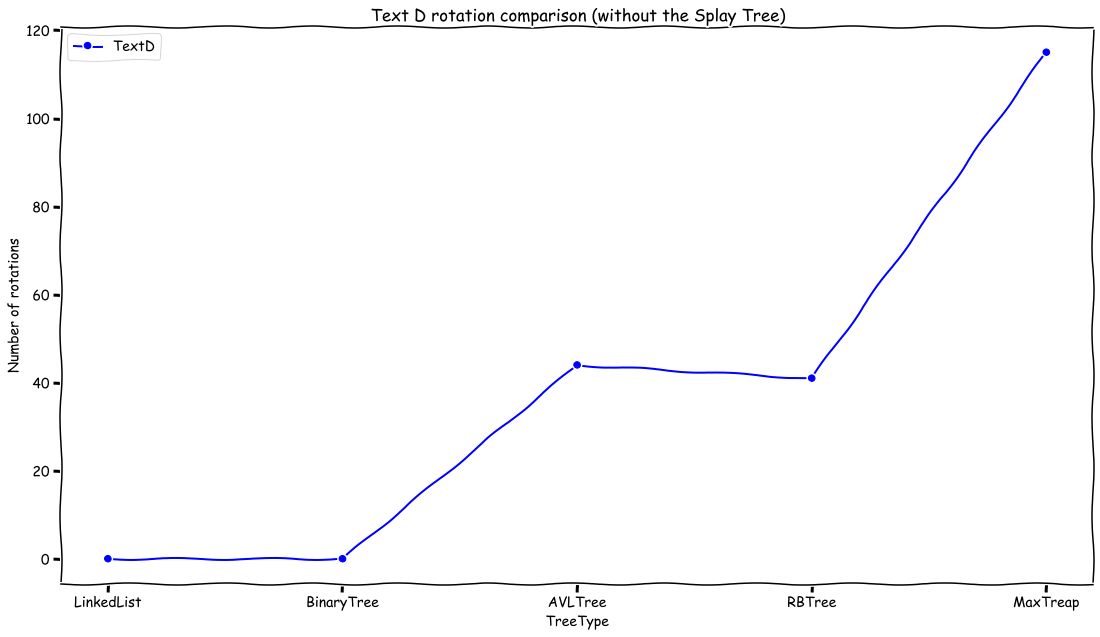

In [4]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
plt.title("Text D rotation comparison (without the Splay Tree)")
plt.xkcd()

plt.plot(labels[0:5], data[19:24,4], "o-b", label="TextD")
plt.legend()
plt.xlabel("TreeType")
plt.ylabel("Number of rotations")



## Build Times
Comparing build times we arrive to yet another interesting result:
The red black tree, which had similar performance in terms of rotation takes much less time to be built, this is due to the fact that the it takes less operations than the avl, it opts for recolors (which are much lighter than rotations).
You may wonder, why did the linked List Perform so well for text B? This is due to the implementation of insertion sort, which reveals to be the best case scenario when the tree is inserted in reverse order.
You can also see that the Splay Tree takes little time despite the huge amount of rotations, this is because the tree is stateless and does not need extra calculations to be performed during the rotation period.

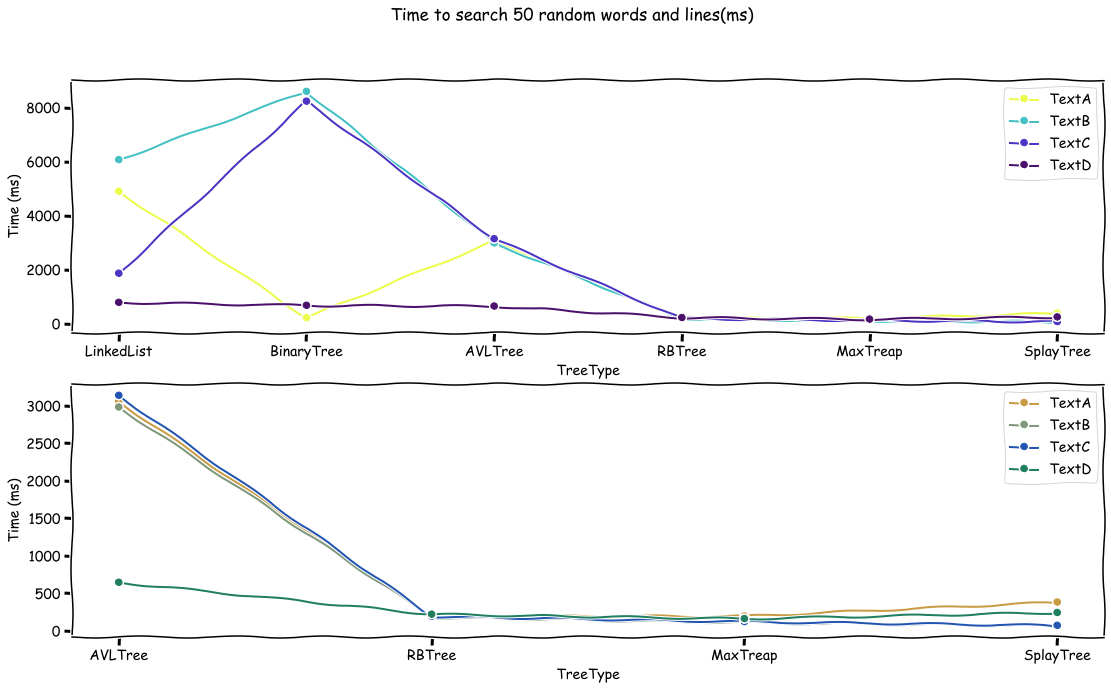

In [5]:
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Time to search 50 random words and lines(ms)")

#plt.style.use("fivethirtyeight")
plt.xkcd()

for i in range(4):
    axs[0].plot(labels[0:], data[i*6 + 1: i* 6 + 7,5], "o-", c=np.random.rand(3,))

for i in range(4):
    axs[1].plot(labels[2:], data[i*6 + 3: i* 6 + 7,5], "o-", c=np.random.rand(3,))

for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Time (ms)")
    ax.legend(["TextA","TextB","TextC","TextD"])


## 50 random word searches in the array
Here we can really see the power of balanced trees vs the regular linked lists and unbalanced trees, this would be subplot 1.
On subplot 2, we get more interesting results, by removing both the binary unbalanced tree and the linked List we can take a look at the performance of the faster trees.
Were we do not see much difference between  AVL, RB and Max Treaps, Proving again that the different lies mostly on the time to generate the tree.
The Splay Tree on the other end gets very bad results on both texts B and C, which means that the order of the insertion actually affects the performance of the Trees.


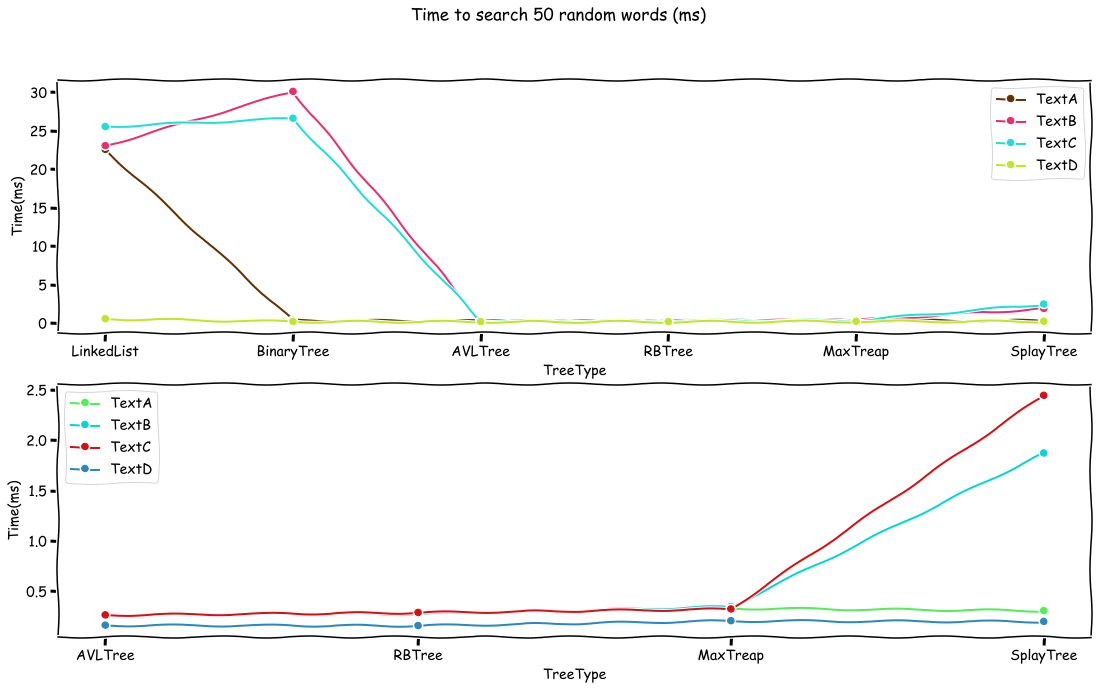

In [6]:
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Time to search 50 random words (ms)")

#plt.style.use("fivethirtyeight")
plt.xkcd()

for i in range(4):
    axs[0].plot(labels[0:], data[i*6 + 1: i* 6 + 7,6], "o-", c=np.random.rand(3,))

for i in range(4):
    axs[1].plot(labels[2:], data[i*6 + 3: i* 6 + 7,6], "o-", c=np.random.rand(3,))

for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Time(ms)")
    ax.legend(["TextA","TextB","TextC","TextD"])

plt.show()

## 50 Word + Lines Searches
Once again we can see the power of the balanced trees, they are much, much faster.
Between AVL and RB there is not much difference again, reinforcing the fact that the main difference lies in their build times.
The interesting result comes in the Splay tree, it is slower in some cases, this is due to the fact that for each search a splay is done.

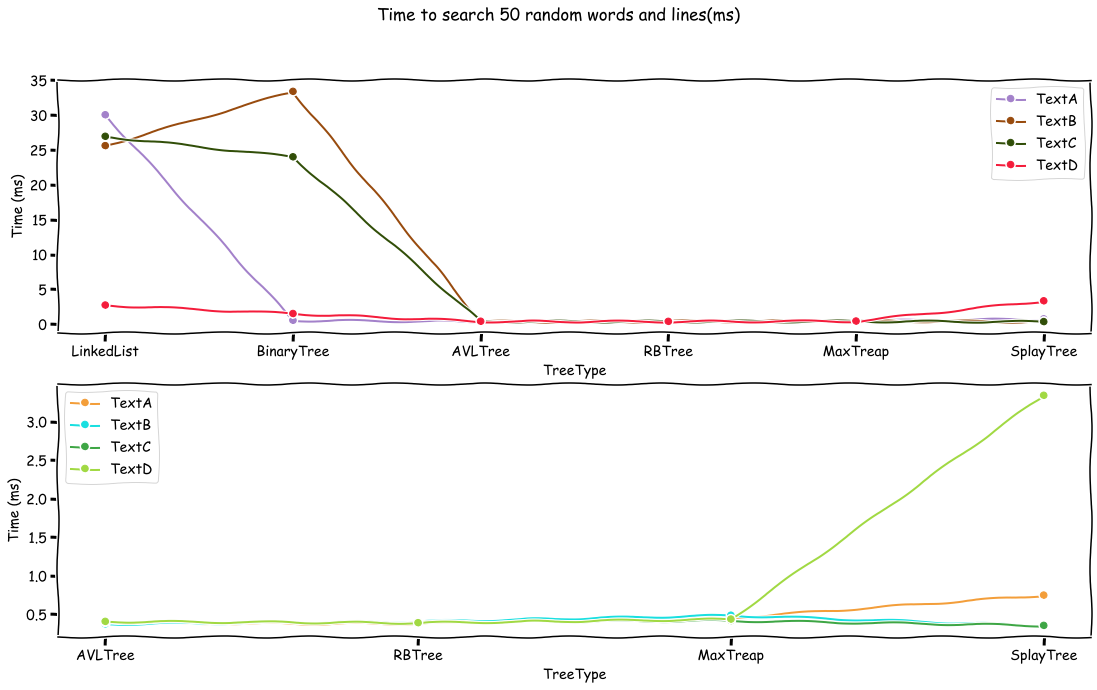

In [7]:
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Time to search 50 random words and lines(ms)")

#plt.style.use("fivethirtyeight")
plt.xkcd()

for i in range(4):
    axs[0].plot(labels[0:], data[i*6 + 1: i* 6 + 7,7], "o-", c=np.random.rand(3,))

for i in range(4):
    axs[1].plot(labels[2:], data[i*6 + 3: i* 6 + 7,7], "o-", c=np.random.rand(3,))

for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Time (ms)")
    ax.legend(["TextA","TextB","TextC","TextD"])


## 500 word searches on a 10 word set
Here we can really see the speed of a Splay when it is best used, to explore locality, a small subset.
Because each word is often repeated the splay operation brings the node closer to the root making it so that in the next iteration that same node is close to the root and takes much less time to be found and splayed again.

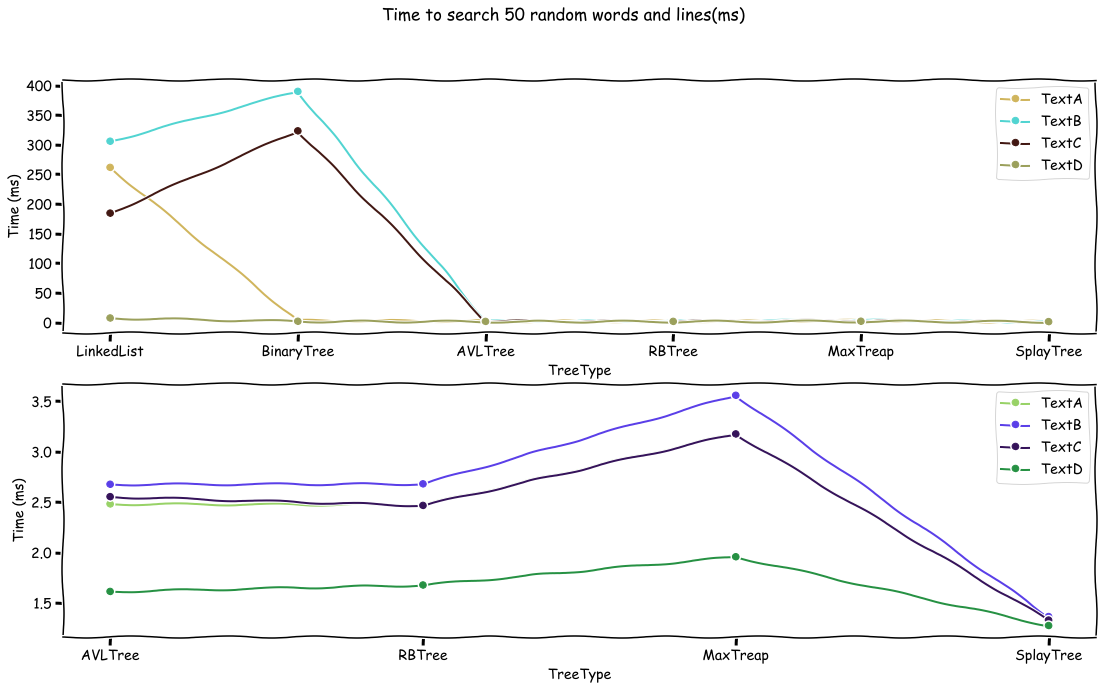

In [8]:
fig, axs = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.25)
fig.suptitle("Time to search 50 random words and lines(ms)")

#plt.style.use("fivethirtyeight")
plt.xkcd()

for i in range(4):
    axs[0].plot(labels[0:], data[i*6 + 1: i* 6 + 7,8], "o-", c=np.random.rand(3,))

for i in range(4):
    axs[1].plot(labels[2:], data[i*6 + 3: i* 6 + 7,8], "o-", c=np.random.rand(3,))

for ax in axs.flat:
    ax.set(xlabel="TreeType", ylabel="Time (ms)")
    ax.legend(["TextA","TextB","TextC","TextD"])
